<a href="https://colab.research.google.com/github/illaho/MASTER_2020_github/blob/master/Scraping_Capterra_TeamViewer_Asana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,130 kB]

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import json
import pprint
import time
import pprint

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [17]:
wd = webdriver.Chrome('chromedriver', options=options)
wd.get("https://www.capterra.com/p/120550/Asana/reviews/")
#wd.get("https://www.capterra.com/p/194565/TeamViewer/reviews/") 

Populating the interactive namespace from numpy and matplotlib


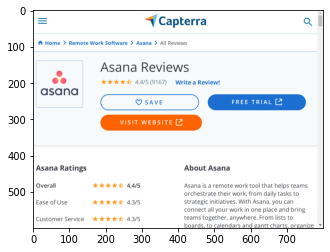

In [18]:
wd.save_screenshot('screenshot.png')
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [5]:
list_50 =[]
for i in range(1,183):
   multiplo = 50*i
   list_50.append(multiplo)
#print(list_50)

In [19]:
num_reviews = wd.find_element_by_css_selector("span.Responsive__HideForMobile-sc-4qthxq-0.fQJWO div.StarRating__Count-sc-9jwzgg-2.iQfOTw").text.split("(")[1].split(")")[0]
#print(num_reviews)
num_reviews = int(num_reviews)

In [ ]:
"""per scraping in più volte, devo ricaricare le reviews, il bottone in fondo carica 50 reviews alla volta
for i in tqdm(range(1, 40)):
  time.sleep(5 + np.random.randn()*0.2)
  wd.find_element_by_css_selector('#LoadableReviewSection > div > div.gtm-review-section > div.WidthLimiter__Root-sjrjtk-0.gIbRfg > div > div > button > div.Button__CenteredText-sc-1p3sq94-4').click()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
review = []
#wd.find_element_by_css_selector('#LoadableReviewSection > div > div.gtm-review-section > div.WidthLimiter__Root-sjrjtk-0.gIbRfg > div > div > button > div.Button__CenteredText-sc-1p3sq94-4').click()
for num in tqdm(range(1, num_reviews + 1)): 
    index = num
    Piattaforma = "Asana" #TeamViewer
    #ID_General = index + " " + Piattaforma
    details_container = wd.find_element_by_css_selector(f"div.gtm-review-section > div:nth-child({num}) > div > div > div > div:nth-child(1) > div.ReviewerAvatarSection__Root-sc-1a80501-0.qIcnK > div.ReviewerAvatarSection__ReviewerInfo-sc-1a80501-1.cSadMy")
    User = details_container.find_element_by_css_selector("div.ReviewerAvatarSection__ReviewerName-sc-1a80501-2.gJQgt").text
    Lavoro = details_container.find_element_by_css_selector("div.ReviewerAvatarSection__ReviewerDetails-sc-1a80501-4.bInnRf > div:nth-child(1)").text
    Settore = details_container.find_element_by_css_selector(" div.ReviewerAvatarSection__ReviewerDetails-sc-1a80501-4.bInnRf > div:nth-child(2)").text.split(',')[0] #check solo personale
    Utilizzo_software = wd.find_element_by_css_selector(" div.ReviewerAvatarSection__ReviewerDetails-sc-1a80501-4.bInnRf > div:nth-child(3)").text.split(': ')[-1]
    review_container = wd.find_element_by_css_selector(f"div.gtm-review-section > div:nth-child({num}) > div > div > div > div.ReviewCard__RightFlexItem-sc-18j15p9-3.cOmWnW.ReviewCard__FlexItem-sc-18j15p9-2.bTVfYT")
    titoloReview = review_container.find_element_by_css_selector("h3").text
    Commenti = review_container.find_element_by_css_selector("div.VisibleInViewport__Root-rewj2p-0.gMsvlr > div:nth-child(2)").text
    Vantaggi = review_container.find_element_by_css_selector("div.VisibleInViewport__Root-rewj2p-0.gMsvlr > div:nth-child(3)").text  
    Incovenienti = review_container.find_element_by_css_selector("div.VisibleInViewport__Root-rewj2p-0.gMsvlr > div:nth-child(4)").text
    Data_Recensione = wd.find_element_by_css_selector(f"div.gtm-review-section > div:nth-child({num}) > div > div > div > div:nth-child(1) > div.ReviewCard__DesktopOnlyDiv-sc-18j15p9-6.gckeCD > div.ReviewSource__Root-lnjke6-0.iBAGLQ > div:nth-child(3)").text
    ValutazioneComplessiva = wd.find_element_by_css_selector(f"div.gtm-review-section > div:nth-child({num}) > div > div > div > div:nth-child(1) > strong > div > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.strip("/")[0]
    star_container = wd.find_elements_by_css_selector(f"div.gtm-review-section > div:nth-child({num}) > div > div > div > div:nth-child(1) > div")
    lunghezza = len(star_container)
    star = wd.find_element_by_css_selector(f"div.gtm-review-section > div:nth-child({num}) > div > div > div > div:nth-child(1)")
    #print(lung)
    if lunghezza == 8:
      star_1 = star.find_element_by_css_selector("div:nth-child(3) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(3) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_2 = star.find_element_by_css_selector("div:nth-child(4) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(4) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_3 = star.find_element_by_css_selector("div:nth-child(5) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(5) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_4 = star.find_element_by_css_selector("div:nth-child(6) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(6) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
    elif lunghezza == 7:
      star_1 = star.find_element_by_css_selector("div:nth-child(3) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(3) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_2 = star.find_element_by_css_selector("div:nth-child(4) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(4) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_3 = star.find_element_by_css_selector("div:nth-child(5) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(5) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_4 = ""
    elif lunghezza == 6:
      star_1 = star.find_element_by_css_selector("div:nth-child(3) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(3) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_2 = star.find_element_by_css_selector("div:nth-child(4) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(4) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_3 = ""
      star_4 = ""
    elif lunghezza == 5:
      star_1 = star.find_element_by_css_selector("div:nth-child(3) > div:nth-child(1)").text + " " + star.find_element_by_css_selector("div:nth-child(3) > div.StarRating__Root-sc-9jwzgg-0.bQJsCF > div.StarRating__Rating-sc-9jwzgg-1.kCLiav").text.split("/")[0]
      star_2 = ""
      star_3 = ""
      star_4 = ""
    else:
      star_1 = ""
      star_2 = ""
      star_3 = ""
      star_4 = "" 
    try:
      Consigliato = star.find_element_by_css_selector("span").text.split("/")[0] 
    except:
      Consigliato = ""
    review.append({'index': index,
                   'Piattaforma': Piattaforma,
                   'User': User,
                   'Lavoro': Lavoro,
                   'Settore': Settore,
                   'Utilizzo_software': Utilizzo_software,
                   'titoloReview': titoloReview,
                   'Commenti': Commenti,
                   'Data_Recensione': Data_Recensione,
                   'Vantaggi': Vantaggi,
                   'Incovenienti': Incovenienti,
                   'ValutazioneComplessiva': ValutazioneComplessiva,
                   'star_1': star_1,
                   'star_2': star_2,
                   'star_3': star_3,
                   'star_4': star_4,
                   'Consigliato': Consigliato}) 
    if num in list_50:
      time.sleep(3 + np.random.randn()*0.2)
      try: 
        wd.find_element_by_css_selector('#LoadableReviewSection > div > div.gtm-review-section > div.WidthLimiter__Root-sjrjtk-0.gIbRfg > div > div > button > div.Button__CenteredText-sc-1p3sq94-4').click()
      except:
        pass  

print(len(review))
#pprint.pprint(review)   
ds_detail_review = pd.DataFrame(review)
ds_detail_review.set_index("index")
#ds_detail_review.head()
ds_detail_review.info()
ds_detail_review.to_csv('ds_review_Asana.csv') #TeamViewer

In [ ]:
ds_detail_review.head(100)